# Lesson 14 : Regression

### Housing Analysis

In this notebook, you will be replicating much of what you saw in this lesson using the housing data shown below.

After you complete this notebook and the set of quizzes that follow, you will be set to try out your skills on a couple new datasets to gain some additional practice.  **Ignore the warning message**.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;

df = pd.read_csv('./house_price_area_only.csv')
df.head()

,price,area
0,598291,1188
1,1744259,3512
2,571669,1134
3,493675,1940
4,1101539,2208


`1.` Use the documentation [here](http://www.statsmodels.org/dev/regression.html) and the **statsmodels** library to fit a linear model to predict **price** based on **area**.  Obtain a summary of the results, and use them to answer the following quiz questions. Don't forget to add an intercept.

In [9]:
df['intercept'] = 1
mod = sm.OLS(df.price, df[['intercept', 'area']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:03:46   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## HomesVCrime

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df['intercept'] = 1
df.head()

,MedianHomePrice,CrimePerCapita,intercept
0,24.0,0.00632,1
1,21.6,0.02731,1
2,34.7,0.02729,1
3,33.4,0.03237,1
4,36.2,0.06905,1


The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use this dataframe to fit a linear model to predict the home price based on the crime rate.  Use your output to answer the first quiz below. Don't forget an intercept.

In [12]:
mod = sm.OLS(df.MedianHomePrice, df[['intercept', 'CrimePerCapita']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           1.17e-19
Time:                        15:25:05   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0331      0.409     58.740      0.000      23.229      24.837
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.`Plot the relationship between the crime rate and median home price below.  Use your plot and the results from the first question as necessary to answer the remaining quiz questions below.

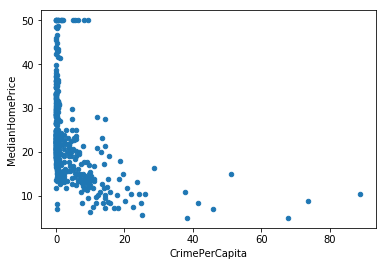

In [17]:
df.plot.scatter("CrimePerCapita", "MedianHomePrice")

# Lesson 15 : Multiple Linear Regression
### Multiple Linear Regression Introduction

In this notebook (and following quizzes), you will be creating a few simple linear regression models, as well as a multiple linear regression model, to predict home value.

Let's get started by importing the necessary libraries and reading in the data you will be using.

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` Using statsmodels, fit three individual simple linear regression models to predict price.  You should have a model that uses **area**, another using **bedrooms**, and a final one using **bathrooms**.  You will also want to use an intercept in each of your three models.

Use the results from each of your models to answer the first two quiz questions below.

In [21]:
df['intercept'] = 1
mod = sm.OLS(df.price, df[['intercept', 'area']])
res = mod.fit()
res.summary()

df['intercept'] = 1
mod = sm.OLS(df.price, df[['intercept', 'bedrooms']])
res = mod.fit()
res.summary()


df['intercept'] = 1
mod = sm.OLS(df.price, df[['intercept', 'bathrooms']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:40:59   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:40:59   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:40:59   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.` Now that you have looked at the results from the simple linear regression models, let's try a multiple linear regression model using all three of these variables  at the same time.  You will still want an intercept in this model.

In [22]:
df['intercept'] = 1
mod = sm.OLS(df.price, df[['intercept', 'area', 'bedrooms', 'bathrooms']])
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:42:48   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Along with using the **area**, **bedrooms**, and **bathrooms** you might also want to use **style** to predict the price.  Try adding this to your multiple linear regression model.  What happens?  Use the final quiz below to provide your answer.

In [24]:
# df['intercept'] = 1
# mod = sm.OLS(df.price, df[['intercept', 'area', 'bedrooms', 'bathrooms', 'style']])
# res = mod.fit()
# res.summary()

## Dummy Variable
You saw in the earlier notebook that you weren't able to directly add a categorical variable to your multiple linear regression model. In this notebook, you will get some practice incorporating categorical data by converting to dummy variables in your models and interpreting the output.

Let's start by reading in the necessary libraries and data.

`1.` Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining dummy variables for the **neighborhood** column.  Then use [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) to add the dummy variables to your dataframe, **df**, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** to predict the price. Don't forget an intercept.

Use your results to answer quiz 1 below.

In [40]:
df = pd.read_csv('./house_prices.csv')
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
df_new['intercept'] = 1
lm = sm.OLS(df_new['price'], df_new[['intercept', 'A', 'B', 'C']])
results = lm.fit()
results.summary()

df = pd.read_csv('./house_prices2.csv')
#df.head()
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
#df_new = df.join(pd.get_dummies(df['neighborhood']))

# df[['A', 'B', 'C']] = pd.get_dummies(df['neighborhood']) 
# df[['lodge', 'range', 'victorian']] = pd.get_dummies(df['style'])
df_new['intercept'] = 1
df_new.head(2)

mod = sm.OLS(df_new['price'], df_new[['intercept', 'A', 'B', 'C']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:15:53   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     2.62e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept
0,1112,B,1188,3,2,ranch,598291,0,1,0,1
1,491,B,3512,5,3,victorian,1744259,0,1,0,1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:15:53   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     2.62e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`2.`  Now, fit an appropriate linear model for using **neighborhood** to predict the price of a home. Use **neighborhood A** as your baseline. (And remember that the values shown in the results for the other neighborhoods will be based on comparisons with this baseline neighborhood A then.) Use your resulting model to answer the questions in Quiz 2 and Quiz 3 below.

In [35]:
mod = sm.OLS(df_new.price, df_new[['intercept', 'area', 'bedrooms', 'bathrooms', 'B', 'C']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:06:43   Log-Likelihood:                -80347.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.032e+05   5912.821    -34.358      0.000   -2.15e+05   -1.92e+05
area         344.3861      3.620     95.136      0.000     337.290     351.482
bedrooms    5609.3443   5136.269      1.092      0.275   -4459.582    1.57e+04
bathrooms  -4900.9423   7146.730     -0.686      0.493   -1.89e+04    9109.207
B           5.245e+05   4576.130    114.608      0.000    5.15e+05    5.33e+05
C             77.9167   4965.730      0.016      0.987   -9656.691    9812.525
==============================================================================
Omnibus:                      138.205   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.990
Skew:                           0.306   Prob(JB):                     2.02e-37
Kurtosis:                       3.545   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Run the two cells below to look at the home prices for the A and C neighborhoods. Add neighborhood B. This creates a glimpse into the differences that you found in the previous linear model.

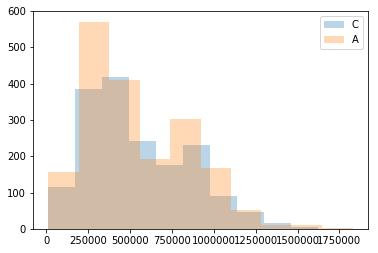

In [34]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

`4.` Now, add dummy variables for the **style** of house. Create a new linear model using these new dummies, as well as the previous **neighborhood** dummies.  Use **ranch** as the baseline for the **style**.  Additionally, add **bathrooms** and **bedrooms** to your linear model.  Don't forget an intercept.  Use the results of your linear model to answer the last two questions below. **Home prices are measured in dollars, and this dataset is not real.**

To minimize scrolling, it might be useful to open another browser window to this concept to answer the quiz questions.

### Multicollinearity & VIFs

Using the notebook here, answer the quiz questioons below regarding multicollinearity.

To get started let's read in the necessary libraries and the data that will be used.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
df = pd.read_csv('./house_prices.csv')
df.head(3)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669


`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.  Use the plot to answer the first quiz questions below.

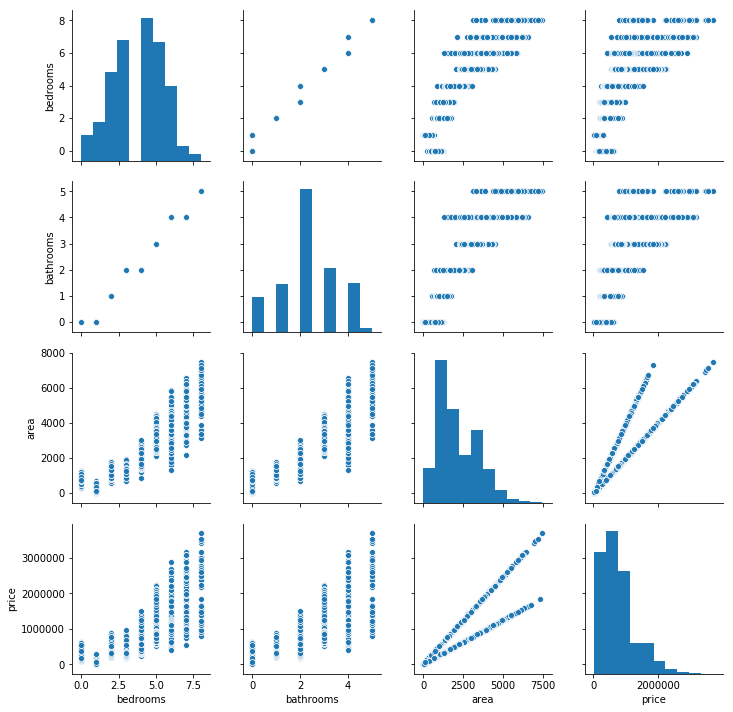

In [52]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area', 'price']]);

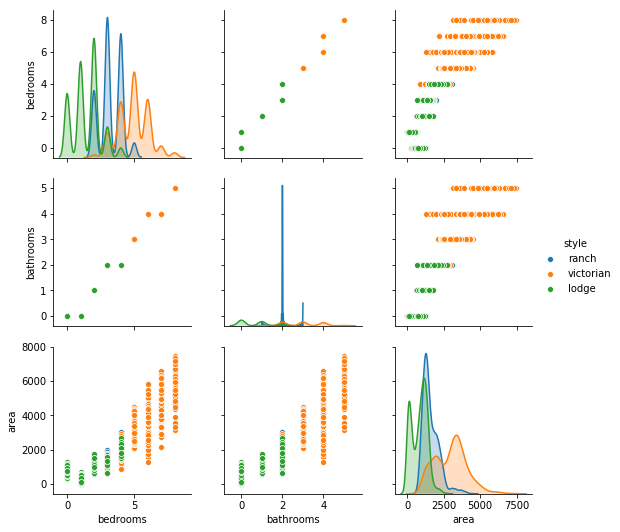

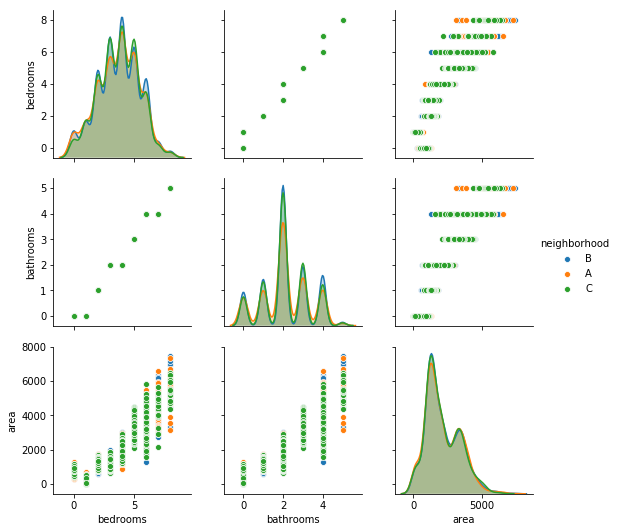

In [53]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area', 'style']], hue="style");

sns.pairplot(df[['bedrooms', 'bathrooms', 'area', 'neighborhood']], hue="neighborhood");

`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [57]:
df['intercept']=1
mod = sm.OLS(df.price, df[['intercept', 'area', 'bedrooms', 'bathrooms']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:36:27   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Calculate the VIFs for each variable in your model.  Use quiz 3 below to provide insights about the results of your VIFs.  [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

In [69]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('./house_prices.csv')
df = df._get_numeric_data(); #drop non-numeric cols
df.head(3)

,house_id,area,bedrooms,bathrooms,price
0,1112,1188,3,2,598291
1,491,3512,5,3,1744259
2,5952,1134,3,2,571669


In [92]:
pv("list(df.columns)[:-1]")

list(df.columns)[:-1] : ['area', 'bedrooms', 'bathrooms']


In [95]:
df = df[['area','bedrooms', 'bathrooms','price']].dropna() #subset the dataframe
#gather features
features = "+".join(list(df.columns)[:-1])
pv("features")
# get y and X dataframes based on this regression:
y, X = dmatrices('price ~' + features, df, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

features : area+bedrooms+bathrooms


,VIF Factor,features
0,7.3,Intercept
1,5.5,area
2,20.9,bedrooms
3,19.0,bathrooms


`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [96]:
features = "+".join(list(df.columns)[:-2])
pv("features")
# get y and X dataframes based on this regression:
y, X = dmatrices('price ~' + features, df, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

features : area+bedrooms


,VIF Factor,features
0,6.1,Intercept
1,5.3,area
2,5.3,bedrooms


In [97]:
df['intercept']=1
mod = sm.OLS(df.price, df[['intercept', 'area', 'bedrooms']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:00:12   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
df['intercept']=1
mod = sm.OLS(df.price, df[['intercept', 'area']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:01:10   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting Coefficients

It is important that not only can you fit complex linear models, but that you then know which variables you can interpret. 

In this notebook, you will fit a few different models and use the quizzes below to match the appropriate interpretations to your coefficients when possible.

In some cases, the coefficients of your linear regression models wouldn't be kept due to the lack of significance. But that is not the aim of this notebook - **this notebook is strictly to assure you are comfortable with how to interpret coefficients when they are interpretable at all**.

In [99]:
df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


We will be fitting a number of different models to this dataset throughout this notebook.  For each model, there is a quiz question that will allow you to match the interpretations of the model coefficients to the corresponding values.  If there is no 'nice' interpretation, this is also an option!

### Model 1

`1.` For the first model, fit a model to predict `price` using `neighborhood`, `style`, and the `area` of the home.  Use the output to match the correct values to the corresponding interpretation in quiz 1 below.  Don't forget an intercept!  You will also need to build your dummy variables, and don't forget to drop one of the columns when you are fitting your linear model. It may be easiest to connect your interpretations to the values in the first quiz by creating the baselines as neighborhood C and home style **lodge**.

In [105]:
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
#df_new = df.join(pd.get_dummies(df['neighborhood']))

# df[['A', 'B', 'C']] = pd.get_dummies(df['neighborhood']) 
style_dummies = pd.get_dummies(df['style'])
df_new = df_new.join(style_dummies)
df_new['intercept'] = 1
df_new.head(2)

mod = sm.OLS(df_new['price'], df_new[['intercept', 'area', 'A', 'B', 'ranch', 'victorian']])
res = mod.fit()
res.summary()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian,intercept
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0,1
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1,1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.983e+05   5540.744    -35.791      0.000   -2.09e+05   -1.87e+05
area         348.7375      2.205    158.177      0.000     344.415     353.060
A           -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B           5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
victorian  -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2

`2.` Now let's try a second model for predicting price.  This time, use `area` and `area squared` to predict price.  Also use the `style` of the home, but not `neighborhood` this time. You will again need to use your dummy variables, and add an intercept to the model. Use the results of your model to answer quiz questions 2 and 3.

In [107]:
df_new['area_squared'] = df_new['area']**2 
df_new.head(2)
mod = sm.OLS(df_new['price'], df_new[['intercept', 'area', 'area_squared', 'ranch', 'victorian']])
res = mod.fit()
res.summary()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian,intercept,area_squared
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0,1,1411344
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1,1,12334144


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:31:42   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**That's right! With the higher order term, the coefficients associated with area and area squared are not easily interpretable. However, coefficients that are not associated with the higher order terms are still interpretable in the way you did earlier.**

In [108]:
df_new.head(2)
mod = sm.OLS(df_new['price'], df_new[['intercept', 'area', 'B']])
res = mod.fit()
res.summary()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,lodge,ranch,victorian,intercept,area_squared
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0,1,1411344
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1,1,12334144


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.430e+04
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:35:10   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6025   BIC:                         1.607e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.989e+05   4128.454    -48.173      0.000   -2.07e+05   -1.91e+05
area         347.2235      1.549    224.154      0.000     344.187     350.260
B           5.244e+05   3908.331    134.169      0.000    5.17e+05    5.32e+05
==============================================================================
Omnibus:                      125.346   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.989
Skew:                           0.287   Prob(JB):                     6.01e-34
Kurtosis:                       3.528   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**That's right! Judging by the first results from the two models you built, the best would likely involve only these two variables, as it would be simplified, while still predicting well.**